## **Prediksi Risiko Kesehatan Ibu Hamil**

### **Pendahuluan**

Kematian ibu merupakan salah satu isu kesehatan global yang masih menjadi perhatian serius hingga saat ini, khususnya di negara-negara berkembang. Berdasarkan agenda Sustainable Development Goals (SDGs) yang diinisiasi oleh Perserikatan Bangsa-Bangsa (PBB), penurunan angka kematian ibu menjadi salah satu target utama yang harus dicapai. Berbagai studi dan data kesehatan menunjukkan bahwa sejumlah faktor medis memiliki pengaruh besar terhadap tingkat risiko kematian ibu. Di antara faktor-faktor tersebut, usia ibu saat kehamilan, tekanan darah sistolik dan diastolik, kadar gula darah, suhu tubuh, serta denyut jantung menjadi indikator penting yang patut mendapatkan perhatian lebih lanjut.

Faktor-faktor ini bukan hanya berperan sebagai indikator kondisi kesehatan ibu, tetapi juga dapat digunakan untuk mengidentifikasi potensi komplikasi selama masa kehamilan dan persalinan. Misalnya, tekanan darah yang terlalu tinggi (hipertensi) dapat mengarah pada preeklampsia, suatu kondisi serius yang berisiko mengancam keselamatan ibu dan janin. Begitu pula dengan kadar gula darah yang tidak terkontrol, yang dapat meningkatkan kemungkinan terjadinya diabetes gestasional dan komplikasi lainnya. Oleh karena itu, pemantauan ketat terhadap variabel-variabel tersebut sangat penting dalam upaya preventif dan penanganan dini terhadap risiko kematian ibu.

Dengan memahami keterkaitan antara faktor-faktor fisiologis ini dengan kematian ibu, maka dapat dikembangkan pendekatan berbasis data yang lebih efektif dalam mendeteksi risiko secara dini. Hal ini sejalan dengan upaya global untuk meningkatkan kualitas layanan kesehatan ibu dan anak sebagai bagian dari pencapaian target SDGs.

Pada Keterangan ini kita akan menganalisis data tentang resiko kesehatan ibu.
Berikut ini langkah-langkah nya:

### **Data Understanding**

#### **Sumber data**

Data telah dikumpulkan dari berbagai rumah sakit, klinik masyarakat, perawatan kesehatan ibu dari daerah pedesaan Bangladesh melalui sistem pemantauan risiko berbasis IoT.
Berikut Ini link sumber datanya:https://archive.ics.uci.edu/dataset/863/maternal+health+risk

In [2]:
!pip install ucimlrepo

#### **Mengumpulkan Data**

Setelah mendapatkan informasi terkait data selanjutnya data kita kumpulkan.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
maternal_health_risk = fetch_ucirepo(id=863)

# data (as pandas dataframes)
X = maternal_health_risk.data.features
y = maternal_health_risk.data.targets

# metadata
print(maternal_health_risk.metadata)

# variable information
print(maternal_health_risk.variables)


{'uci_id': 863, 'name': 'Maternal Health Risk', 'repository_url': 'https://archive.ics.uci.edu/dataset/863/maternal+health+risk', 'data_url': 'https://archive.ics.uci.edu/static/public/863/data.csv', 'abstract': 'Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1013, 'num_features': 6, 'feature_types': ['Real', 'Integer'], 'demographics': ['Age'], 'target_col': ['RiskLevel'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DP5D', 'creators': ['Marzia Ahmed'], 'intro_paper': {'ID': 274, 'type': 'NATIVE', 'title': 'Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT)', 'authors':

#### **Mendeskripsikan data**

Dataset ini berisi data kesehatan ibu hamil dengan sejumlah indikator fisiologis yang diukur, dengan tujuan untuk memprediksi tingkat risiko kesehatan ibu. Data ini sangat relevan dalam upaya pencegahan kematian ibu dan mendukung tujuan SDGs PBB.

Fitur (X)

| Nama Fitur      | Deskripsi Singkat                             |
| --------------- | --------------------------------------------- |
| **Age**         | Usia ibu (dalam tahun)                        |
| **SystolicBP**  | Tekanan darah sistolik (mm Hg)                |
| **DiastolicBP** | Tekanan darah diastolik (mm Hg)               |
| **BS**          | Blood Sugar (Gula darah acak, dalam mmol/L)   |
| **BodyTemp**    | Suhu tubuh (dalam derajat Celsius)            |
| **HeartRate**   | Denyut jantung (dalam BPM - beats per minute) |

Target (Y)

| Nama Target   | Deskripsi                                          |
| ------------- | -------------------------------------------------- |
| **RiskLevel** | Tingkat risiko kesehatan ibu: `low`, `mid`, `high` |



Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')


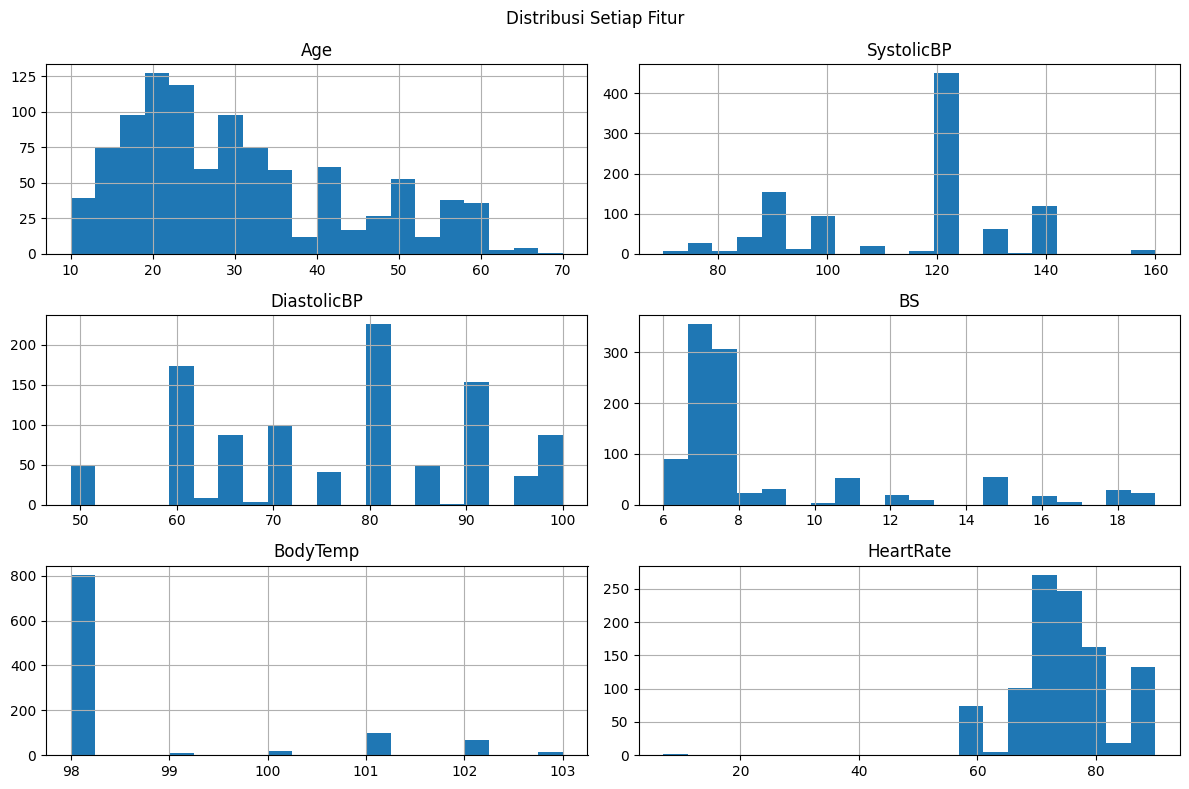

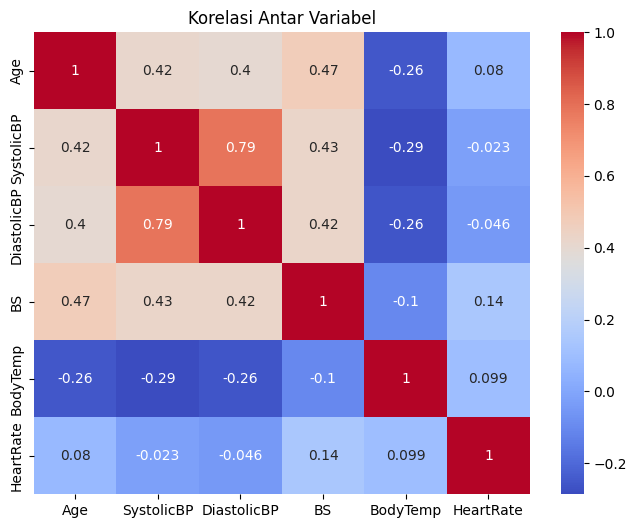

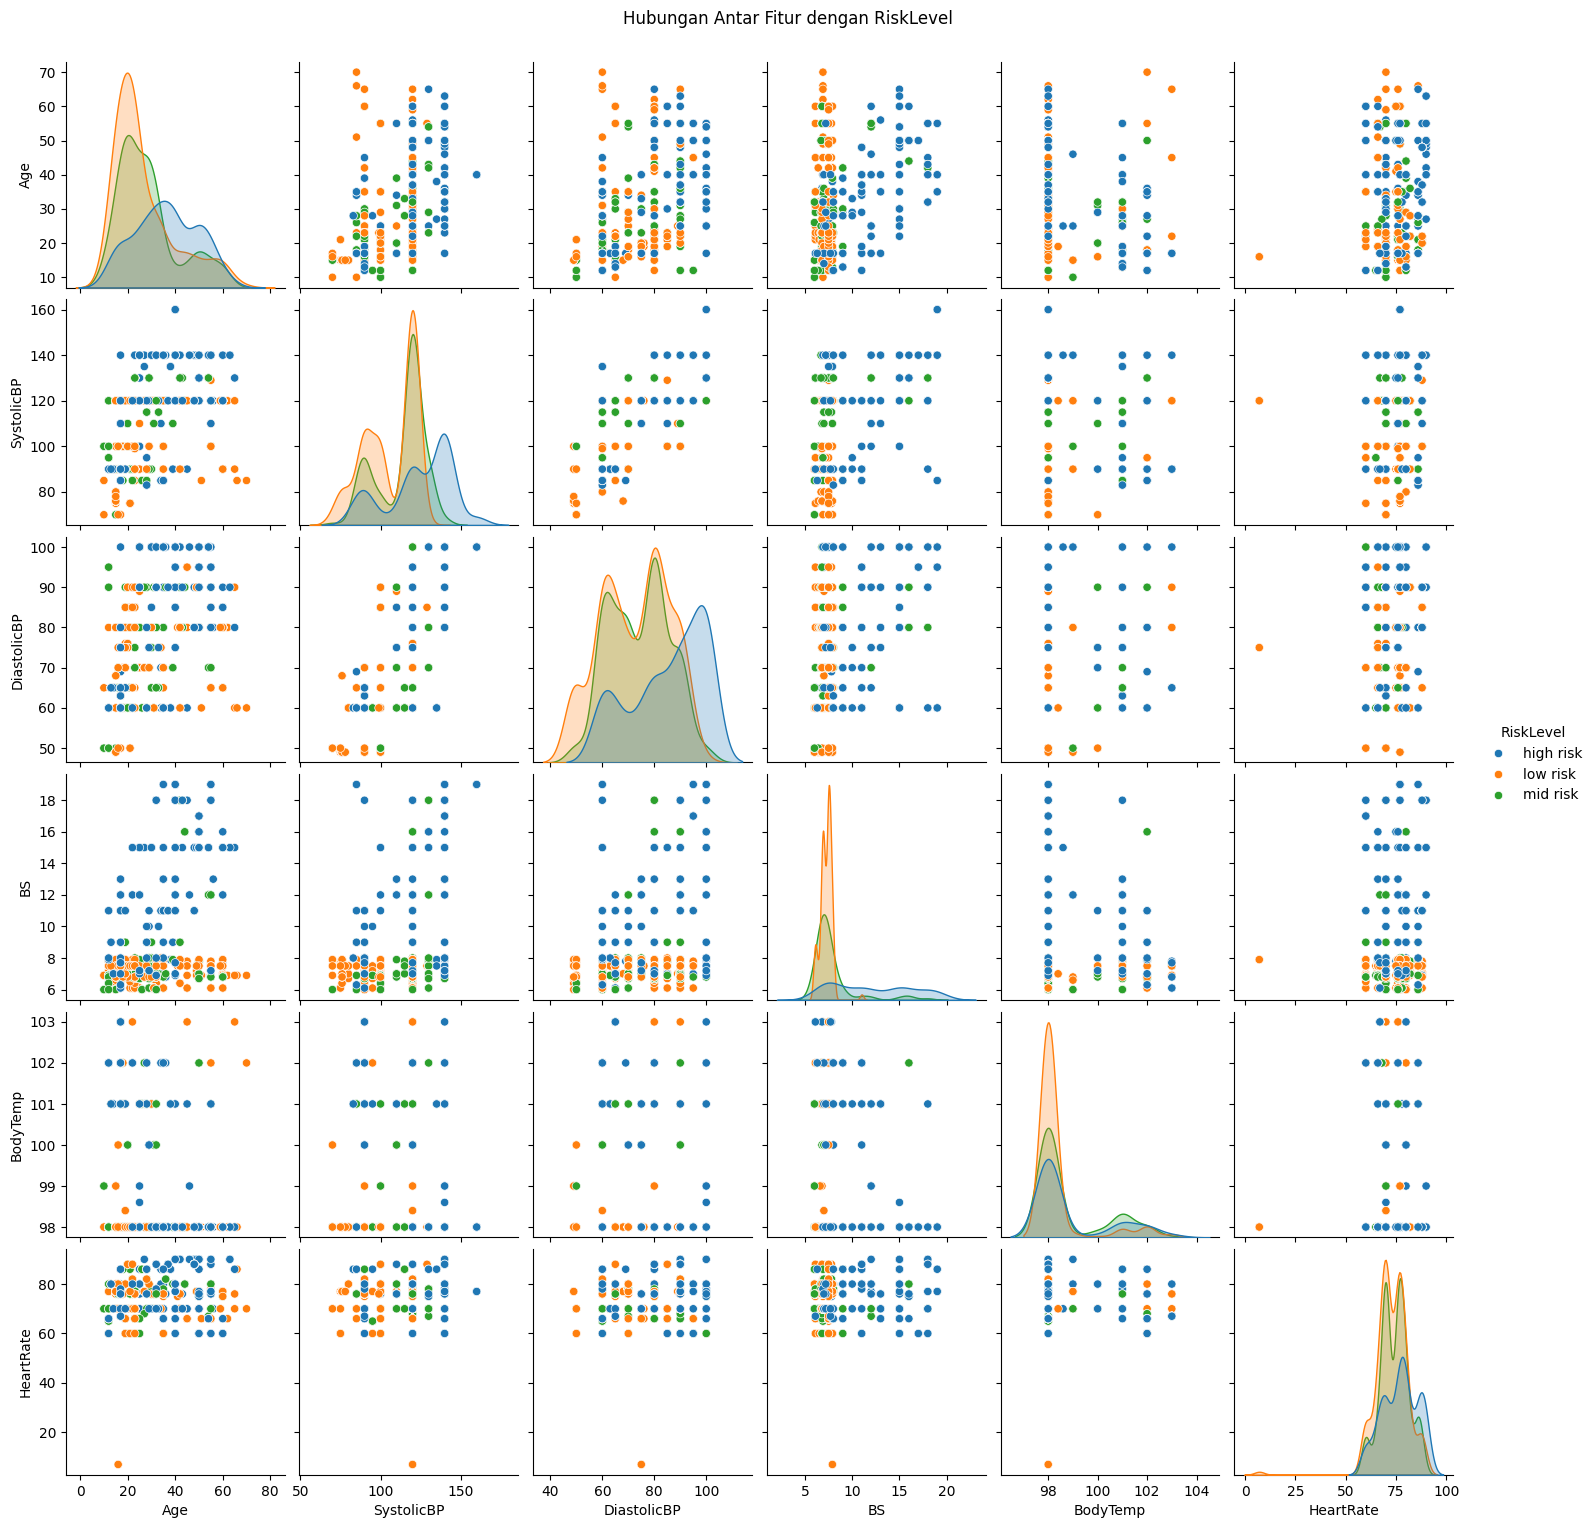

In [11]:
# Cek dan gabungkan X dan y
df = pd.concat([X, y], axis=1)

# Cek nama kolom target
print(df.columns)

# Plot distribusi setiap fitur
X.hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribusi Setiap Fitur")
plt.tight_layout()
plt.show()

# Plot korelasi antar fitur
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Variabel")
plt.show()

# Visualisasi hubungan antara fitur dan target
sns.pairplot(pd.concat([X, y], axis=1), hue="RiskLevel")
plt.suptitle("Hubungan Antar Fitur dengan RiskLevel", y=1.02)
plt.show()


penjelasan ringkas jumlah data, baris dan kolom sebagai berikut:

In [7]:
print(X.shape)

print(f"Jumlah baris (data): {X.shape[0]}")
print(f"Jumlah kolom (fitur): {X.shape[1]}")


(1014, 6)
Jumlah baris (data): 1014
Jumlah kolom (fitur): 6


### **Preprocessing data**

pada proses ini data yang tadinya dikumpulkan, didefinisikan dll dalam proses data understanding langkah selanjutnya yaitu preprocessing data yang mana data ini kita mendeteksi data yang terindikasi outlier (jika ditemukan), Misiing value dll. harapannya setelah proses ini kita tau data yang kotor itu mana dan ada berapa serta data yang missing value itu mana dan ada berapa.

In [12]:
# Gabungkan fitur dan target untuk tampilan lengkap
data_full = pd.concat([X, y], axis=1)

# Tampilkan 10 data pertama
print(data_full.head(10))


   Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.00      98.0         86  high risk
1   35         140           90  13.00      98.0         70  high risk
2   29          90           70   8.00     100.0         80  high risk
3   30         140           85   7.00      98.0         70  high risk
4   35         120           60   6.10      98.0         76   low risk
5   23         140           80   7.01      98.0         70  high risk
6   23         130           70   7.01      98.0         78   mid risk
7   35          85           60  11.00     102.0         86  high risk
8   32         120           90   6.90      98.0         70   mid risk
9   42         130           80  18.00      98.0         70  high risk


#### **Mendeteksi Missing Value**

yang pertama kita deteksi dulu apakah dalam data ada missing value nya.

In [15]:
# 2. Ambil dataset dari UCI ML Repository (ID: 863)
maternal_health_risk = fetch_ucirepo(id=863)

# 3. Pisahkan data fitur dan target
X = maternal_health_risk.data.features
y = maternal_health_risk.data.targets

# 4. Gabungkan fitur dan target untuk mempermudah eksplorasi
data_full = pd.concat([X, y], axis=1)

# 5. Tampilkan 10 data pertama
print("=== 10 Data Pertama ===")
print(data_full.head(10))

# 6. Cek informasi tipe data dan jumlah non-null per kolom
print("\n=== Informasi Dataset ===")
print(data_full.info())

# 7. Cek jumlah missing value per kolom
print("\n=== Missing Value per Kolom ===")
print(data_full.isnull().sum())

# 8. Total semua missing value di seluruh dataset
print("\n=== Total Missing Value ===")
print(data_full.isnull().sum().sum())

=== 10 Data Pertama ===
   Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.00      98.0         86  high risk
1   35         140           90  13.00      98.0         70  high risk
2   29          90           70   8.00     100.0         80  high risk
3   30         140           85   7.00      98.0         70  high risk
4   35         120           60   6.10      98.0         76   low risk
5   23         140           80   7.01      98.0         70  high risk
6   23         130           70   7.01      98.0         78   mid risk
7   35          85           60  11.00     102.0         86  high risk
8   32         120           90   6.90      98.0         70   mid risk
9   42         130           80  18.00      98.0         70  high risk

=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --

#### **Mendeteksi Outlier**

In [21]:
X_cleaned = X.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikat: {len(X_cleaned)}")


# Hitung z-score dari setiap kolom numerik
z_scores = np.abs(zscore(X))

# Tentukan ambang batas (biasanya 3.0)
threshold = 3

# Cari data yang memiliki z-score > 3 pada kolom mana pun
outliers_z = (z_scores > threshold).any(axis=1)

print(f"Jumlah data outlier berdasarkan Z-Score: {np.sum(outliers_z)}")

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Tentukan outlier jika berada di luar Q1 - 1.5*IQR atau Q3 + 1.5*IQR
is_outlier_iqr = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)

print(f"Jumlah data outlier berdasarkan IQR: {np.sum(is_outlier_iqr)}")

lof = LocalOutlierFactor(n_neighbors=50, contamination=0.05)
y_pred_lof = lof.fit_predict(X)
outlier_lof = (y_pred_lof == -1)

print(f"Jumlah data outlier berdasarkan LOF (n=50): {np.sum(outlier_lof)}")

Jumlah data setelah menghapus duplikat: 416
Jumlah data outlier berdasarkan Z-Score: 37
Jumlah data outlier berdasarkan IQR: 394
Jumlah data outlier berdasarkan LOF (n=50): 50


#### **Menghilangkan data terdeteksi oulier menggunakan LOF**

setelah kita deteksi dan data yang kita pakai terdapat outlier dan juga duplikat maka kita hilangkan dulu data-data tersebut.

In [26]:
# ================================================
# 1. Ambil Data
# ================================================
dataset = fetch_ucirepo(id=863)
X = dataset.data.features
y = dataset.data.targets
data_full = pd.concat([X, y], axis=1)

print(f"Jumlah data awal: {len(data_full)}")

# ================================================
# 2. Hapus Duplikat
# ================================================
data_no_duplicates = data_full.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikat: {len(data_no_duplicates)}")

# ================================================
# 3. Deteksi Outlier dengan Local Outlier Factor
# ================================================
X_numerik = data_no_duplicates.drop(columns=['RiskLevel'])  # Hanya fitur numerik
lof = LocalOutlierFactor(n_neighbors=50, contamination=0.05)
outlier_pred = lof.fit_predict(X_numerik)

# Tandai outlier
# Pastikan salinan aman sebelum memodifikasi kolom
data_no_duplicates = data_no_duplicates.copy()
data_no_duplicates['Outlier'] = outlier_pred
data_clean = data_no_duplicates[data_no_duplicates['Outlier'] == 1]  # hanya inlier

print(f"Jumlah data setelah menghapus outlier: {len(data_clean)}")

# ================================================
# 4. Tampilkan 10 Data Pertama yang Bersih
# ================================================
print("\n=== 10 Data Pertama Setelah Bersih ===")
print(data_clean.drop(columns='Outlier').head(10))

Jumlah data awal: 1014
Jumlah data setelah menghapus duplikat: 452
Jumlah data setelah menghapus outlier: 430

=== 10 Data Pertama Setelah Bersih ===
    Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
0    25         130           80  15.00      98.0         86  high risk
1    35         140           90  13.00      98.0         70  high risk
2    29          90           70   8.00     100.0         80  high risk
3    30         140           85   7.00      98.0         70  high risk
4    35         120           60   6.10      98.0         76   low risk
6    23         130           70   7.01      98.0         78   mid risk
7    35          85           60  11.00     102.0         86  high risk
8    32         120           90   6.90      98.0         70   mid risk
9    42         130           80  18.00      98.0         70  high risk
10   23          90           60   7.01      98.0         76   low risk


#### **Normalisasi data**

lanjut kita normalisasi datanya

In [27]:
# Pisahkan fitur dan target dari data bersih
X_clean = data_clean.drop(columns=['Outlier', 'RiskLevel'])
y_clean = data_clean['RiskLevel']

# Normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_clean)

# Konversi kembali ke DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_clean.columns)

# Tampilkan hasil normalisasi (5 data pertama)
print("=== Data Setelah Normalisasi ===")
print(X_scaled.head())


=== Data Setelah Normalisasi ===
        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate
0  0.272727    0.647059     0.607843  0.692308       0.0   0.866667
1  0.454545    0.764706     0.803922  0.538462       0.0   0.333333
2  0.345455    0.176471     0.411765  0.153846       0.4   0.666667
3  0.363636    0.764706     0.705882  0.076923       0.0   0.333333
4  0.454545    0.529412     0.215686  0.007692       0.0   0.533333


### **Modelling data**

setelah melalui beberapa tahapan mulai dari data understanding sampai preprocessing, selanjutnya data akan kita modelling data.

Kita akan melatih model SVM dan evaluasi performanya menggunakan akurasi dan confusion matrix

In [29]:
# Bagi data jadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

# Buat dan latih model SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = svm_model.predict(X_test)

print("\n=== Akurasi Model ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.2f}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


=== Akurasi Model ===
Akurasi: 0.76

=== Classification Report ===
              precision    recall  f1-score   support

   high risk       0.75      0.82      0.78        22
    low risk       0.78      0.98      0.87        44
    mid risk       0.57      0.20      0.30        20

    accuracy                           0.76        86
   macro avg       0.70      0.67      0.65        86
weighted avg       0.72      0.76      0.71        86


=== Confusion Matrix ===
[[18  1  3]
 [ 1 43  0]
 [ 5 11  4]]


setelah muncul modelnya kita bandingkan dengan model (KNN, Decision Tree dan Naive Bayes)

🔍 KNN Accuracy: 0.71
🔍 Decision Tree Accuracy: 0.60
🔍 Naive Bayes Accuracy: 0.71


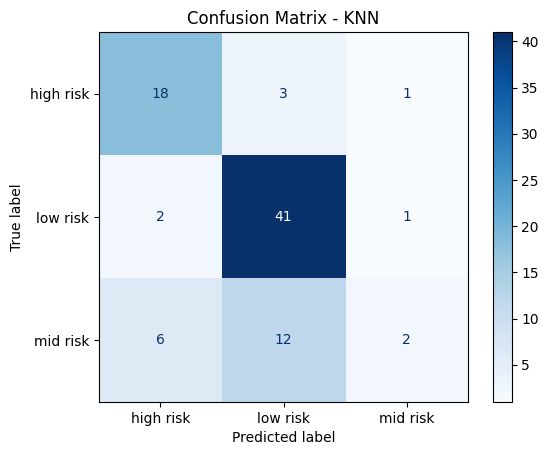

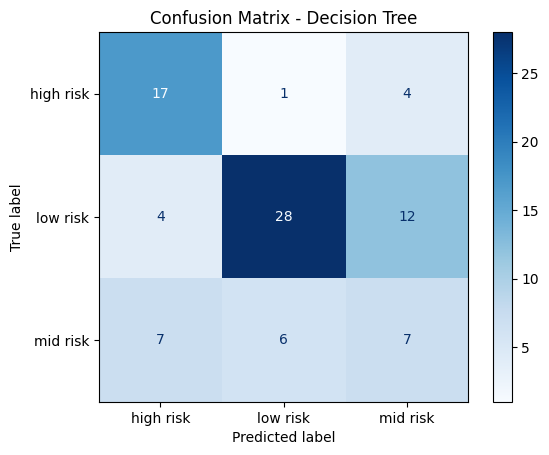

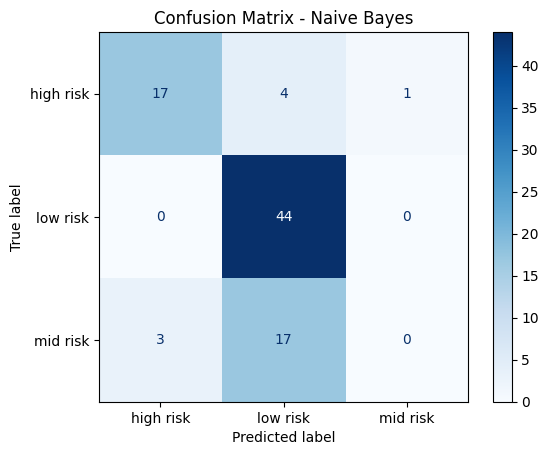

In [32]:
# Inisialisasi model
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Latih dan evaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"🔍 {name} Accuracy: {acc:.2f}")

# Fungsi untuk plot confusion matrix
def plot_conf_matrix(model, X, y_true, title):
    y_pred = model.predict(X)
    cm = confusion_matrix(y_true, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

# Visualisasi untuk setiap model
for name, model in models.items():
    plot_conf_matrix(model, X_test, y_test, name)


Simpan hasil model yang terbaik:

In [37]:
import joblib

# Simpan model ke file
joblib.dump(models["Decision Tree"], "decision_tree_model.pkl")
print("✅ Model Decision Tree disimpan sebagai 'decision_tree_model.pkl'")

✅ Model Decision Tree disimpan sebagai 'decision_tree_model.pkl'


setelah itu simpan data yang bersih

In [34]:
# Simpan data bersih ke file CSV (tanpa kolom Outlier)
data_bersih_csv = data_clean.drop(columns='Outlier')
data_bersih_csv.to_csv("maternal_health_clean.csv", index=False)
print("✅ Data bersih disimpan sebagai 'maternal_health_clean.csv'")

✅ Data bersih disimpan sebagai 'maternal_health_clean.csv'


### **Evaluasi**

setelah kita model data dengan berbagai metode. kita evaluasi semuanya model:


=== 📋 Evaluasi Model: KNN ===
🔹 Akurasi: 0.71

🔹 Classification Report:
              precision    recall  f1-score   support

   high risk       0.69      0.82      0.75        22
    low risk       0.73      0.93      0.82        44
    mid risk       0.50      0.10      0.17        20

    accuracy                           0.71        86
   macro avg       0.64      0.62      0.58        86
weighted avg       0.67      0.71      0.65        86



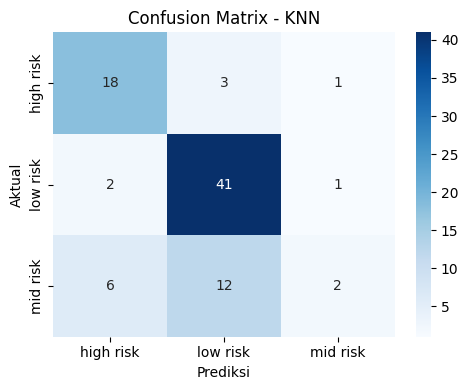

🔹 Cross-val score (mean): 0.65 | std: 0.06

=== 📋 Evaluasi Model: Decision Tree ===
🔹 Akurasi: 0.60

🔹 Classification Report:
              precision    recall  f1-score   support

   high risk       0.61      0.77      0.68        22
    low risk       0.80      0.64      0.71        44
    mid risk       0.30      0.35      0.33        20

    accuracy                           0.60        86
   macro avg       0.57      0.59      0.57        86
weighted avg       0.64      0.60      0.61        86



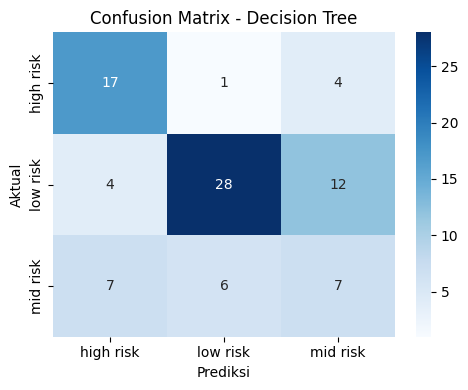

🔹 Cross-val score (mean): 0.55 | std: 0.10

=== 📋 Evaluasi Model: Naive Bayes ===
🔹 Akurasi: 0.71

🔹 Classification Report:
              precision    recall  f1-score   support

   high risk       0.85      0.77      0.81        22
    low risk       0.68      1.00      0.81        44
    mid risk       0.00      0.00      0.00        20

    accuracy                           0.71        86
   macro avg       0.51      0.59      0.54        86
weighted avg       0.56      0.71      0.62        86



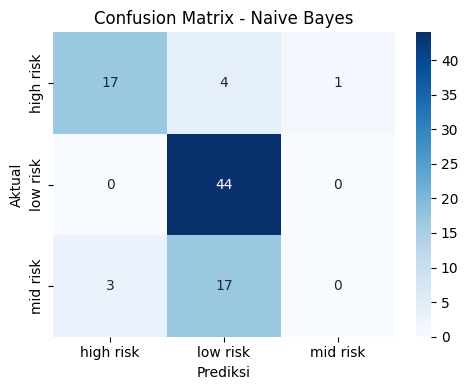

🔹 Cross-val score (mean): 0.62 | std: 0.06


In [35]:
# Evaluasi fungsi lengkap per model
def evaluate_model(name, model, X_test, y_test):
    print(f"\n=== 📋 Evaluasi Model: {name} ===")

    # Prediksi
    y_pred = model.predict(X_test)

    # Akurasi
    acc = accuracy_score(y_test, y_pred)
    print(f"🔹 Akurasi: {acc:.2f}")

    # Laporan klasifikasi
    print("\n🔹 Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.tight_layout()
    plt.show()

    # Cross-validation score
    scores = cross_val_score(model, X_scaled, y_clean, cv=5)
    print(f"🔹 Cross-val score (mean): {scores.mean():.2f} | std: {scores.std():.2f}")

# Evaluasi setiap model
for name, model in models.items():
    evaluate_model(name, model, X_test, y_test)

### **Hasil Deploy**

https://app-uas-pendat-kesehatan-ibu-hamil.streamlit.app/

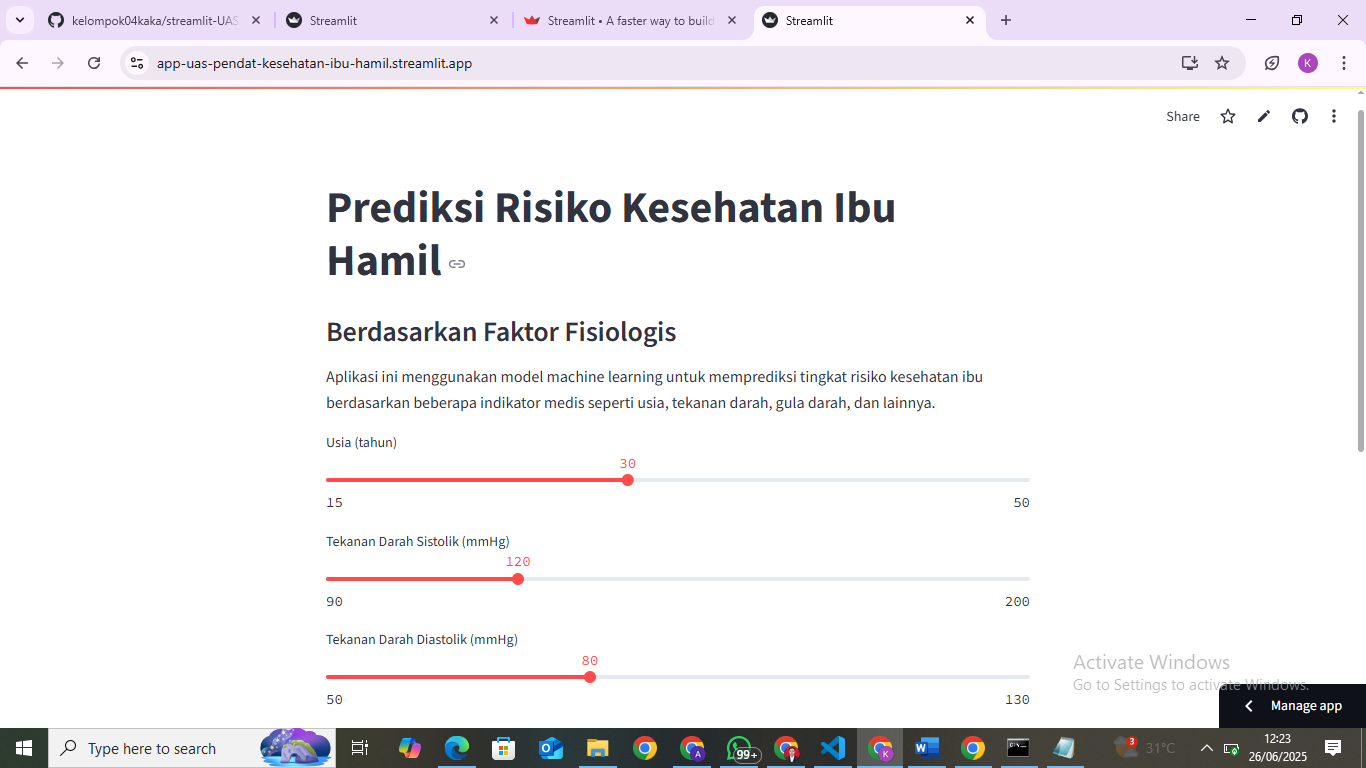